# Webcam Facial Recognition 
---
First part of this notebook: Dataset; Transfer learning VGGNet; Facial Recognition Model; Application  

Second part of this notebook: Media Pipe Tesseract; Face Landmarks; Face Detection

---

1\. Create and save dataset 

    We used 15 initial pictures of each of us; used haarcascade_frontalface_default.xml to detect and the ImageDataGenerator class to augment the images that we have for training. The ImageDataGenerator class applies different transformations to our images so that one single image can be transformed into different images in order to train our model more extensively. We furthermore created our data labels. 

2\. Train Model (CNN; VGGNet)

    we used a pretrained model 'VGGNet' which is a deep CNN with above 19 layers; skipped these layers and trained it further with our created dataset of step 1; the model was saved as 'transfer_learning_vggface_cnn_model'.

3\. Application (OpenCV)

    the application opens the laptop webcam and recognizes up to 5 faces; if the class 'joshua' is predicted the applciation grants access to our spotify acc; for other classes access is denied; the confidence of the model is set to a treshold of 68; a confidence below 68 will result in a classification of 'unknown'. 

---
### 1\. Create and save dataset


---Photo skipped---



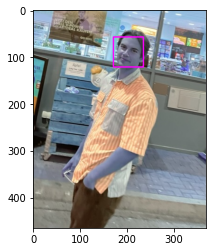

---Photo skipped---



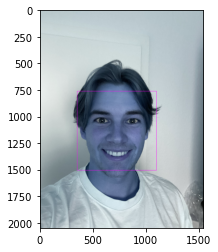

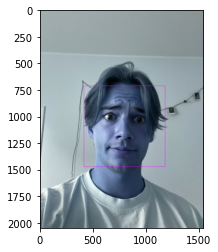

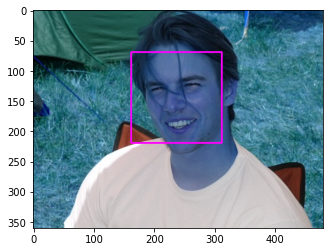

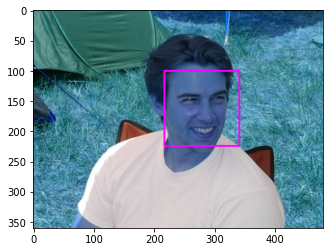

---Photo skipped---

---Photo skipped---

---Photo skipped---



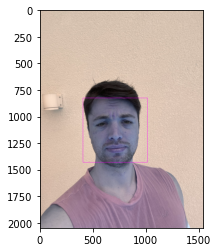

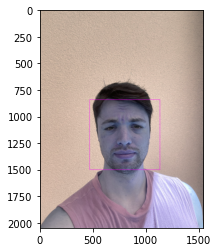

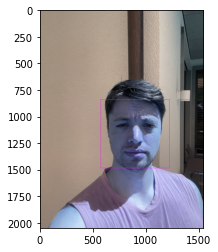

---Photo skipped---



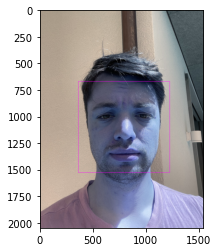

---Photo skipped---



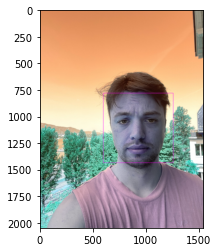

---Photo skipped---



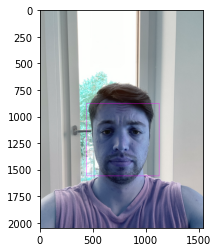

---Photo skipped---

---Photo skipped---



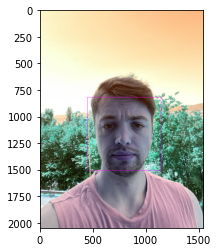

---Photo skipped---



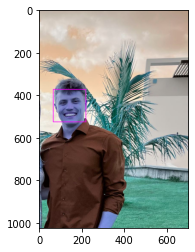

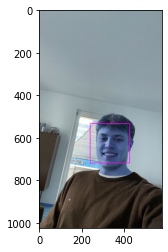

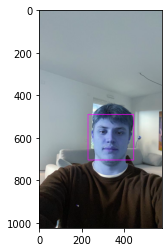

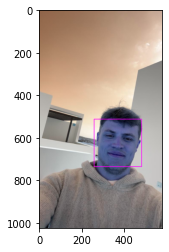

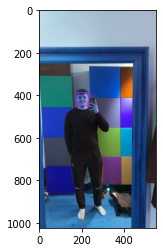

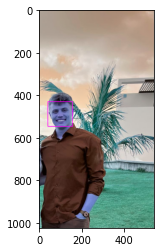

---Photo skipped---

---Photo skipped---



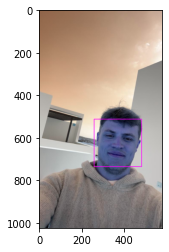

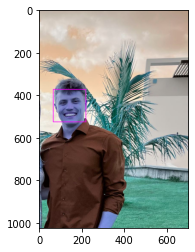

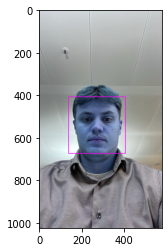

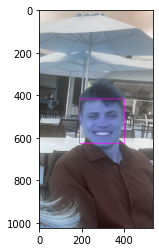

---Photo skipped---



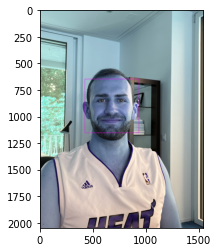

---Photo skipped---

---Photo skipped---

---Photo skipped---

---Photo skipped---

---Photo skipped---

---Photo skipped---

---Photo skipped---



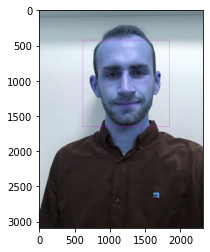

---Photo skipped---

---Photo skipped---



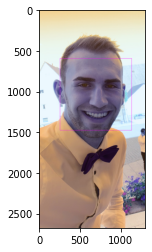

---Photo skipped---

---Photo skipped---

---Photo skipped---



In [12]:
# Imports
import cv2
import os
import pickle
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

dataset_folder_name = 'dataset_cnn'

# def of dimension of images
image_width = 224
image_height = 224

# detecting faces in saved images of us 
facecascade = cv2.CascadeClassifier('data/cascades/haarcascade_frontalface_default.xml')

# directory containing the images
images_dir = os.path.join(".", dataset_folder_name)

current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
            # path of the image
            path = os.path.join(root, file)

            # get the label name (name of the person)
            label = os.path.basename(root).replace(" ", ".").lower()

            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1

            # load the image
            imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
            image_array = np.array(imgtest, "uint8")

            # get the faces detected in the image
            faces = facecascade.detectMultiScale(imgtest,
            scaleFactor=1.1, minNeighbors=5)

            # if not exactly 1 face is detected, skip this photo
            if len(faces) != 1:
                print(f'---Photo skipped---\n')
                # remove the original image
                os.remove(path)
                continue

            # save the detected face(s) and associate
            # them with the label
            for (x_, y_, w, h) in faces:

                # draw the face detected
                face_detect = cv2.rectangle(imgtest,
                        (x_, y_),
                        (x_+w, y_+h),
                        (255, 0, 255), 2)
                plt.imshow(face_detect)
                plt.show()

                # resize the detected face 224x224
                size = (image_width, image_height)

                # detected face region
                roi = image_array[y_: y_ + h, x_: x_ + w]

                # resize the detected head to target size
                resized_image = cv2.resize(roi, size)
                image_array = np.array(resized_image, "uint8")

                
                # replace the image with only the face
                im = Image.fromarray(image_array)
                im.save(path)


---
### 2\. Train model 

In [13]:
# Further imports
import os
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras as keras

import matplotlib.pyplot as plt

from keras.layers import Dense, GlobalAveragePooling2D

from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.optimizers import Adam

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

train_generator = \
    train_datagen.flow_from_directory(
'./dataset_cnn',
target_size=(224,224),
color_mode='rgb',
batch_size=32,
class_mode='categorical',
shuffle=True)

Found 25 images belonging to 4 classes.


In [15]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())
NO_CLASSES

4

In [16]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [17]:
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [18]:
x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)

In [19]:
# create a new model with the base model's original input and the 
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers of VGGNet
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [20]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [21]:
model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)

Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000027794B6B7F0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000027794B6B7F0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

In [84]:
# creates a HDF5 file
# verjährte Herangehensweise 

# model.save(
#     'transfer_learning_trained' +
#     '_face_cnn_model.h5')

c:\Users\DELSTEI9\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# save trained model 

model.save(
    "transfer_learning_vggface_cnn_model1"
)

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000277B6841240>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000277B6841240>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

INFO:tensorflow:Assets written to: transfer_learning_vggface_cnn_model1\assets


INFO:tensorflow:Assets written to: transfer_learning_vggface_cnn_model1\assets


In [23]:
from keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model(
    'transfer_learning_vggface_cnn_model1')

In [24]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)

{0: 'constantin', 1: 'joshua', 2: 'luis', 3: 'pascal'}


In [25]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)

In [26]:
# Further Imports 
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image


In [27]:
# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['constantin', 'joshua', 'luis', 'pascal']


In [37]:
from PIL import Image
import numpy as np
import time
import cv2
import pickle
from keras.models import load_model

# face detection
face_cascade = cv2.CascadeClassifier('data/cascades/haarcascade_frontalface_default.xml')

# resolution of the webcam
screen_width = 1280       
screen_height = 720

# size of the image to predict
image_width = 224
image_height = 224

# load the trained model
model = load_model('transfer_learning_vggface_cnn_model')

# the labels for the trained model
with open("face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {key: value for key, value in og_labels.items()}
    print(f' labes: {labels}')

# default webcam
stream = cv2.VideoCapture(0)

last_detection_time = time.time()
person_identified = False
identified_person = None

# threshold for classifying unknown persons
confidence_threshold = 68 # threshhold = confidence von 68, da dieser für unsere Klassifikation die beste Güte erzeugt hat
print(f' threshhold: {confidence_threshold}')

while True:
    # Capture frame-by-frame
    (grabbed, frame) = stream.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # try to detect faces in the webcam
    faces = face_cascade.detectMultiScale(rgb, scaleFactor=1.3, minNeighbors=5)

    # for each face found
    for (x, y, w, h) in faces:
        roi_rgb = rgb[y:y+h, x:x+w]

        # Draw a rectangle around the face
        color = (255, 0, 0)
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        # resize the image
        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1, image_width, image_height, 3) 
        img = img.astype('float32')
        img /= 255

        # predict the image
        predicted_prob = model.predict(img)
        confidence = round(predicted_prob[0].max() * 100, 2)
        
        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        if confidence >= confidence_threshold:
            name = labels[predicted_prob[0].argmax()]
        else:
            name = "unknown"
        
        color = (255, 0, 0)
        stroke = 2
        cv2.putText(frame, f'{name}', (x+5, y-5), font, 1, color,  stroke, cv2.LINE_AA)
        cv2.putText(frame, f'{confidence}', (x+5, y+h-5), font, 1, color, stroke, cv2.LINE_AA)

        if confidence >= confidence_threshold:
            if not person_identified:
                # If a person is newly detected, update the timer and set the person_identified flag
                last_detection_time = time.time()
                person_identified = True
                identified_person = name

            # Check if the person has been detected for 5 seconds
            if time.time() - last_detection_time >= 5:
                if identified_person == 'joshua':
                    # Display "Access Granted" when the person is identified as 'joshua'
                    cv2.putText(frame, "Access Granted", (x - 20, y + h + 30), font, 1, (0, 255, 0), stroke, cv2.LINE_AA)
                else:
                    # Display "Access Not Granted" for other identified persons and 'unknown'
                    cv2.putText(frame, "Access Not Granted", (x - 20, y + h + 30), font, 1, (0, 0, 255), stroke, cv2.LINE_AA)            
        
        else:
            # Reset the person_identified flag when no person is detected
            person_identified = False
            identified_person = None

            
    # Show the frame
    cv2.imshow("Image", frame)
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting 
    if k == 27:
        break

# Cleanup
stream.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)


 labes: {0: 'constantin', 1: 'joshua', 2: 'luis', 3: 'pascal'}
 threshhold: 68
1/1 [==============================] - 0s 121ms/step


-1

In [23]:
# Imports 
## Mediapipe tesseract 
import cv2
import mediapipe as mp

# Mediapipe Face Mesh Tesselations 
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles



webcam=cv2.VideoCapture(0)
while webcam.isOpened():
    success,img=webcam.read()

    # applying face mesh model 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = mp_face_mesh.FaceMesh(refine_landmarks=True).process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=img,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None, 
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
            )



    # Show the frame
    cv2.imshow("Face Recognition", img)
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting 
    if k == 27:
        break   
    
# Cleanup
webcam.release()
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1